<a href="https://colab.research.google.com/github/Gorgo0815/PDS1920/blob/master/Copy_of_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Practical Data Science 19/20*
# Programming Assignment

In this programming assignment you need to apply your new `numpy`, `pandas` and `matplotlib` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html)`s to solve the task. 

Load required packages

In [0]:
import pandas as pd
%matplotlib inline 

Load Data

In [0]:
DATA_URL = 'https://raw.githubusercontent.com/pds1920/_a1-template/master/data/'

transactions    = pd.read_csv(DATA_URL + '/sales_train.csv.gz')
items           = pd.read_csv(DATA_URL + '/items.csv')
item_categories = pd.read_csv(DATA_URL + '/item_categories.csv')

## Get to know the data
Print the **shape** of the loaded dataframes.
- You can use a list comprehension here

In [5]:
dfs = [transactions, items, item_categories]
for n in dfs:
  print(n.shape)


(1400001, 6)
(22170, 3)
(84, 2)


Use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows of each data frame.  Examine the features you are given.

In [5]:
transactions.head()



,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,14.10.2013,9,19,7204,199.0,1.0
1,23.10.2013,9,19,7096,799.0,1.0
2,19.10.2013,9,19,7204,199.0,1.0
3,17.10.2013,9,19,7206,199.0,1.0
4,13.10.2013,9,19,7459,299.0,1.0


In [6]:
transactions[transactions['item_cnt_day'] < 0].head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
701,13.10.2013,9,18,15675,199.0,-1.0
1798,09.10.2013,9,57,6501,699.0,-1.0
2647,09.10.2013,9,17,6091,999.0,-1.0
3302,09.10.2013,9,57,4181,1090.0,-1.0
3381,10.10.2013,9,57,4241,999.0,-1.0
3624,18.10.2013,9,57,4793,1499.0,-1.0
4956,11.10.2013,9,14,6091,999.0,-1.0
5500,21.10.2013,9,12,1735,299.0,-1.0
5506,21.10.2013,9,12,2090,449.0,-1.0
5531,29.10.2013,9,12,1830,599.0,-1.0


In [7]:
items.head(10)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


In [8]:
item_categories.head(10)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


Now use your `pandas` skills to get answers for the following questions. 

## What was the maximum total revenue among all the shops in June, 2014?


* Revenue refers to total sales minus value of goods returned.
* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 6` in order to select target subset of dates.
* You may work with `date` feature as with strings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [6]:
import datetime

transactions['year'] = pd.DatetimeIndex(transactions['date']).year
transactions['month'] = pd.DatetimeIndex(transactions['date']).month
transactions['day'] = pd.DatetimeIndex(transactions['date']).day
transactions.head()


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day
0,14.10.2013,9,19,7204,199.0,1.0,2013,10,14
1,23.10.2013,9,19,7096,799.0,1.0,2013,10,23
2,19.10.2013,9,19,7204,199.0,1.0,2013,10,19
3,17.10.2013,9,19,7206,199.0,1.0,2013,10,17
4,13.10.2013,9,19,7459,299.0,1.0,2013,10,13


In [7]:
#max_revenue 
rev = transactions[(transactions['year'] == 2014)  & (transactions['month'] == 6)]
rev['shop_id'].unique()
rev['item_sale'] = rev['item_price'] * rev ['item_cnt_day']
rev.head()
rev.groupby('shop_id')['item_sale'].sum().sort_values(ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


shop_id
31    5761264.70
25    5369607.00
54    5038218.90
28    4906587.00
27    4528085.50
57    3052016.64
42    3016842.00
6     2646600.00
43    2552462.98
46    2542425.00
47    2303173.00
15    1982216.00
58    1981781.00
56    1922055.00
19    1870101.00
7     1858827.00
35    1839955.30
24    1827178.00
18    1700520.00
38    1618413.00
53    1612711.00
50    1597807.00
16    1495333.00
12    1486290.58
21    1469082.00
29    1401679.00
30    1385410.00
22    1327193.00
59    1313043.60
5     1292921.00
26    1287926.00
4     1234599.00
2     1205757.00
52    1167591.00
41    1156103.00
48    1128953.00
14    1112327.00
45    1073040.00
17     988085.00
44     979608.00
37     954034.00
3      807444.00
55     796646.98
49     787002.00
39     747718.00
51     661861.94
10     539032.68
40     277040.00
13     251504.53
33     201841.00
34      43274.00
20      -5999.00
Name: item_sale, dtype: float64

In [0]:
max_revenue 5761264.70

## How many items are there?

* Let's assume, that the items are returned for the same price as they had been sold

In [8]:
#num_items_constant_price 

rev['item_id'].value_counts()

20949    1170
7834      361
6675      334
7790      321
5822      314
         ... 
21511       1
17700       1
3020        1
17349       1
8613        1
Name: item_id, Length: 7985, dtype: int64

In [9]:
num_items_constant_price 7985

SyntaxError: ignored

## What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?

* Do not count the items that were sold but returned back later.
* Fill `total_num_items_sold`: An (ordered) array that contains the total number of items sold on each day 
* Fill `days`: An (ordered) array that contains all relevant days
* Then compute variance of the of `total_num_items_sold`
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [38]:
#shop_id = 25
#transactions.info()
ipd = transactions[(transactions['item_cnt_day'] >= 0) & (transactions['shop_id'] == 25) & (transactions['year'] == 2014) & (transactions['month'] ==12) ]   
ipd.head()


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day
347641,12.01.2014,12,25,18191,299.0,1.0,2014,12,1
347645,12.01.2014,12,25,18258,199.0,1.0,2014,12,1
347669,12.01.2014,12,25,18792,149.0,1.0,2014,12,1
347674,12.01.2014,12,25,18701,199.0,1.0,2014,12,1
347675,12.01.2014,12,25,18685,199.0,1.0,2014,12,1


In [32]:
total_num_items_sold = ipd.groupby('day')['item_cnt_day'].sum().sort_values(ascending=False)
total_num_items_sold



days = ipd.groupby('day')['item_cnt_day'].sum()
days


day
1      200.0
2      190.0
3      204.0
4      301.0
5       90.0
6      206.0
7      229.0
8      159.0
9      235.0
10     236.0
11     147.0
12     297.0
13     432.0
14     306.0
15     225.0
16     192.0
17     285.0
18     326.0
19     418.0
20     579.0
21     381.0
22     318.0
23     371.0
24     434.0
25     506.0
26     620.0
27     746.0
28     662.0
30    1966.0
31     776.0
Name: item_cnt_day, dtype: float64

In [29]:
total_num_items_sold_var =(ipd.groupby('day')['item_cnt_day'].var())

total_num_items_sold_var

day
1      0.250204
2      0.318078
3      0.396623
4      0.439344
5      0.151337
6      0.150538
7      1.744485
8      0.969348
9      5.948395
10     3.370044
11     0.332000
12     1.857143
13     3.718289
14     2.220542
15     1.318355
16     1.479117
17     1.518885
18     5.525344
19     4.507391
20     6.700495
21     3.923963
22     2.230618
23     2.072724
24     3.163754
25     2.158389
26     7.608312
27     7.515804
28    10.304247
30    43.355580
31    10.855135
Name: item_cnt_day, dtype: float64

## Vizualization of the daily items sold

Use `total_num_items_sold` and `days` arrays to and plot the daily revenue of `shop_id = 25` in December, 2014.

* plot-title: 'Daily items sold for shop_id = 25'

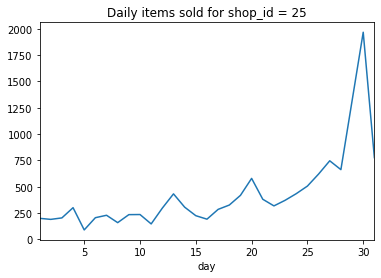

In [42]:
import matplotlib.pyplot as plt

daily_rev = pd.DataFrame(days)
days.head()

days.plot( title = 'Daily items sold for shop_id = 25' )


## What item category that generated the highest revenue in spring 2014?</b></li>

   
Spring is the period from March to Mai.

In [51]:
transactions['revenue'] = transactions['item_price'] * transactions['item_cnt_day']
transactions.head()
spring_rev = transactions[(transactions['year'] == 2014) & (transactions['month'] >= 3) & (transactions['month'] <= 5)]
spring_rev_id = pd.merge(spring_rev, items, on='item_id' )
spring_rev_id.head()
spring_rev_id.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 251732 entries, 0 to 251731
Data columns (total 12 columns):
date                251732 non-null object
date_block_num      251732 non-null int64
shop_id             251732 non-null int64
item_id             251732 non-null int64
item_price          251732 non-null float64
item_cnt_day        251732 non-null float64
year                251732 non-null int64
month               251732 non-null int64
day                 251732 non-null int64
revenue             251732 non-null float64
item_name           251732 non-null object
item_category_id    251732 non-null int64
dtypes: float64(3), int64(7), object(2)
memory usage: 25.0+ MB


In [52]:
category_id_with_max_revenue = spring_rev_id.groupby('item_category_id')['revenue'].sum().sort_values(ascending=False)
category_id_with_max_revenue.head()

item_category_id
20    3.888570e+07
12    3.664864e+07
19    3.314918e+07
23    2.330925e+07
30    2.099255e+07
Name: revenue, dtype: float64

In [0]:
category_id_with_max_revenue = 20